In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

In [2]:
df = pd.read_csv('data/jena_climate_2009_2016.csv')
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


## Pre-Process Data

In [3]:
df = df[5::6] # starting from 5, take every 6th data point
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [4]:
df.index = pd.to_datetime(df['Date Time'], format = '%d.%m.%Y %H:%M:%S')
df[:25]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
2009-01-01 06:00:00,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
2009-01-01 07:00:00,01.01.2009 07:00:00,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,2.88,348.8
2009-01-01 08:00:00,01.01.2009 08:00:00,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
2009-01-01 09:00:00,01.01.2009 09:00:00,999.69,-7.66,265.52,-8.84,91.2,3.43,3.13,0.30,1.95,3.13,1310.14,0.34,0.63,202.2


<Axes: xlabel='Date Time'>

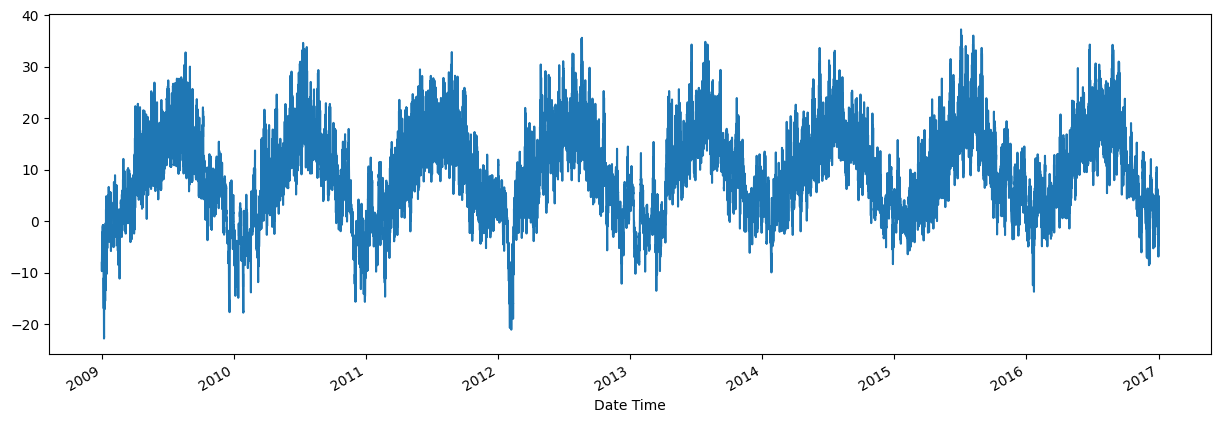

In [5]:
temp = df['T (degC)']
temp.plot(figsize = (15,5))

<Axes: xlabel='Date Time'>

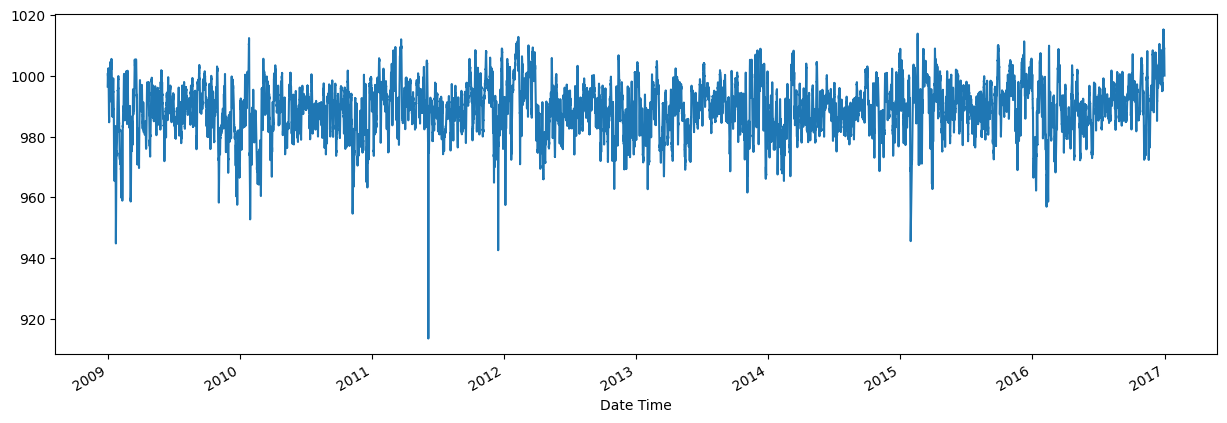

In [6]:
pressure = df['p (mbar)']
pressure.plot(figsize = (15, 5))

In [7]:
temp_df = pd.DataFrame({'Temperature': temp})
pressure_df = pd.DataFrame({'Pressure': pressure})
p_t_df = pd.concat([temp_df, pressure_df['Pressure']], axis = 1)
p_t_df.head()

,Temperature,Pressure
Date Time,,
2009-01-01 01:00:00,-8.05,996.50
2009-01-01 02:00:00,-8.88,996.62
2009-01-01 03:00:00,-8.81,996.84
2009-01-01 04:00:00,-9.05,996.99
2009-01-01 05:00:00,-9.63,997.46


In [8]:
p_t_df['Seconds'] = p_t_df.index.map(pd.Timestamp.timestamp)
p_t_df

,Temperature,Pressure,Seconds
Date Time,,,
2009-01-01 01:00:00,-8.05,996.50,1.230772e+09
2009-01-01 02:00:00,-8.88,996.62,1.230775e+09
2009-01-01 03:00:00,-8.81,996.84,1.230779e+09
2009-01-01 04:00:00,-9.05,996.99,1.230782e+09
2009-01-01 05:00:00,-9.63,997.46,1.230786e+09
...,...,...,...
2016-12-31 19:10:00,-0.98,1002.18,1.483211e+09
2016-12-31 20:10:00,-1.40,1001.40,1.483215e+09
2016-12-31 21:10:00,-2.75,1001.19,1.483219e+09


In [9]:
day = 24 * 60 * 60
year = 365.2425 * day

In [10]:
p_t_df['Day sin'] = np.sin(p_t_df['Seconds'] * (2 * np.pi / day))
p_t_df['Day cos'] = np.cos(p_t_df['Seconds'] * (2 * np.pi / day))

p_t_df['Year sin'] = np.sin(p_t_df['Seconds'] * (2 * np.pi / day))
p_t_df['Year cos'] = np.cos(p_t_df['Seconds'] * (2 * np.pi / day))

p_t_df.head()

,Temperature,Pressure,Seconds,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,,
2009-01-01 01:00:00,-8.05,996.50,1.230772e+09,0.258819,0.965926,0.258819,0.965926
2009-01-01 02:00:00,-8.88,996.62,1.230775e+09,0.500000,0.866025,0.500000,0.866025
2009-01-01 03:00:00,-8.81,996.84,1.230779e+09,0.707107,0.707107,0.707107,0.707107
2009-01-01 04:00:00,-9.05,996.99,1.230782e+09,0.866025,0.500000,0.866025,0.500000
2009-01-01 05:00:00,-9.63,997.46,1.230786e+09,0.965926,0.258819,0.965926,0.258819


In [11]:
p_t_df = p_t_df.drop('Seconds', axis = 1)
p_t_df.head()

,Temperature,Pressure,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,-8.05,996.50,0.258819,0.965926,0.258819,0.965926
2009-01-01 02:00:00,-8.88,996.62,0.500000,0.866025,0.500000,0.866025
2009-01-01 03:00:00,-8.81,996.84,0.707107,0.707107,0.707107,0.707107
2009-01-01 04:00:00,-9.05,996.99,0.866025,0.500000,0.866025,0.500000
2009-01-01 05:00:00,-9.63,997.46,0.965926,0.258819,0.965926,0.258819


In [12]:
def df_to_X_y(df, window_size = 7): # use 7 hours of data to predict 8th
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]]
        y.append(label)
    return np.array(X), np.array(y)

In [13]:
X, y = df_to_X_y(p_t_df)
X.shape, y.shape

((70084, 7, 6), (70084, 2))

In [14]:
X

array([[[-8.05000000e+00,  9.96500000e+02,  2.58819045e-01,
          9.65925826e-01,  2.58819045e-01,  9.65925826e-01],
        [-8.88000000e+00,  9.96620000e+02,  5.00000000e-01,
          8.66025404e-01,  5.00000000e-01,  8.66025404e-01],
        [-8.81000000e+00,  9.96840000e+02,  7.07106781e-01,
          7.07106781e-01,  7.07106781e-01,  7.07106781e-01],
        ...,
        [-9.63000000e+00,  9.97460000e+02,  9.65925826e-01,
          2.58819045e-01,  9.65925826e-01,  2.58819045e-01],
        [-9.67000000e+00,  9.97710000e+02,  1.00000000e+00,
          4.33995489e-12,  1.00000000e+00,  4.33995489e-12],
        [-9.17000000e+00,  9.98330000e+02,  9.65925826e-01,
         -2.58819045e-01,  9.65925826e-01, -2.58819045e-01]],

       [[-8.88000000e+00,  9.96620000e+02,  5.00000000e-01,
          8.66025404e-01,  5.00000000e-01,  8.66025404e-01],
        [-8.81000000e+00,  9.96840000e+02,  7.07106781e-01,
          7.07106781e-01,  7.07106781e-01,  7.07106781e-01],
        [-9.05000

In [15]:
X_train, y_train = X[:60000], y[:60000]
X_val, y_val = X[60000:65000], y[60000:65000]
X_test, y_test = X[65000:], y[65000:]

In [16]:
temp_train_mean = np.mean(X_train[:, :, 0])
temp_train_std = np.std(X_train[:, :, 0])
    
pressure_train_mean = np.mean(X_train[:, :, 1])
pressure_train_std = np.std(X_train[:, :, 1])

def preprocess(X, y):
    X[:, :, 0] = (X[:, :, 0] - temp_train_mean) / temp_train_std
    X[:, :, 1] = (X[:, :, 1] - pressure_train_mean) / pressure_train_std
    
    y[:, 0] = (y[:, 0] - temp_train_mean) / pressure_train_std
    y[:, 1] = (y[:, 1] - pressure_train_mean) / pressure_train_std
    
    return X, y

In [17]:
preprocess(X_train, y_train)
preprocess(X_val, y_val)
preprocess(X_test, y_test)

(array([[[ 1.04009390e+00, -1.07355644e+00, -9.65925826e-01,
           2.58819045e-01, -9.65925826e-01,  2.58819045e-01],
         [ 9.90728707e-01, -1.00807435e+00, -8.66025404e-01,
           5.00000000e-01, -8.66025404e-01,  5.00000000e-01],
         [ 8.49685305e-01, -9.51080673e-01, -7.07106781e-01,
           7.07106781e-01, -7.07106781e-01,  7.07106781e-01],
         ...,
         [ 6.66328883e-01, -8.80748054e-01, -2.58819045e-01,
           9.65925826e-01, -2.58819045e-01,  9.65925826e-01],
         [ 5.37039098e-01, -8.29817537e-01, -7.16474371e-12,
           1.00000000e+00, -7.16474371e-12,  1.00000000e+00],
         [ 4.74744929e-01, -8.01927015e-01,  2.58819045e-01,
           9.65925826e-01,  2.58819045e-01,  9.65925826e-01]],
 
        [[ 9.90728707e-01, -1.00807435e+00, -8.66025404e-01,
           5.00000000e-01, -8.66025404e-01,  5.00000000e-01],
         [ 8.49685305e-01, -9.51080673e-01, -7.07106781e-01,
           7.07106781e-01, -7.07106781e-01,  7.07106781e-01],

# Simple LSTM model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import load_model

In [25]:
model = Sequential()
model.add(InputLayer((7,6))) # input based on last two values of shape. double parantheses for correct LSTM input shape
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(2, 'linear'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                18176     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 2)                 18        
                                                                 
Total params: 18714 (73.10 KB)
Trainable params: 18714 (73.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
cp = ModelCheckpoint('model1/', save_best_only = True)

In [28]:
model.compile(loss = MeanSquaredError(),
               optimizer = Adam(learning_rate = 0.0001),
               metrics = [RootMeanSquaredError()]
              )

In [85]:
model.fit(X_train, y_train,
          validation_data = (X_val, y_val),
          epochs = 10,
          callbacks = [cp]
)

Epoch 1/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.0719INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 25s 13ms/step - loss: 0.0052 - root_mean_squared_error: 0.0719 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0634
Epoch 2/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.0718INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 26s 14ms/step - loss: 0.0052 - root_mean_squared_error: 0.0718 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0630
Epoch 3/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.0718INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 25s 13ms/step - loss: 0.0051 - root_mean_squared_error: 0.0718 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0628
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0052 - root_mean_squared_error: 0.0718 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0634
Epoch 5/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.0715INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 25s 13ms/step - loss: 0.0051 - root_mean_squared_error: 0.0715 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0618
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0051 - root_mean_squared_error: 0.0715 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0635
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0051 - root_mean_squared_error: 0.0714 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0637
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0051 - root_mean_squared_error: 0.0714 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0627
Epoch 9/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0051 - root_mean_squared_error: 0.0713 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0627
Epoch 10/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0051 - root_mean_squared_error: 0.0711 - val_loss:

In [31]:
def postprocess(arr, std, mean):
    arr = (arr*std) - mean
    return arr

In [71]:
def postprocessdf(model, X, y, start = 0, end = 100):
    predictions = model.predict(X)
    temp_preds, pressure_preds = postprocess(predictions[:, 0], temp_train_std, temp_train_mean), postprocess(predictions[:, 1], pressure_train_std, pressure_train_mean)
    temp_actuals, pressure_actuals = postprocess(y[:, 0], temp_train_std, temp_train_mean), postprocess(y[:, 1], pressure_train_std, pressure_train_mean)
    df = pd.DataFrame({'Temperature Predictions': temp_preds,
                      'Temperature Actuals': temp_actuals,
                      'Pressure Predictions': pressure_preds,
                      'Pressure Actuals': pressure_actuals})
    return df[start:end]

In [87]:
post_df = postprocessdf(model, X_test, y_test)

159/159 [==============================] - 1s 5ms/step


In [73]:
post_df.head()

,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,-5.917262,-5.800450,-995.538757,-995.516229
1,-6.322185,-6.316305,-995.497559,-995.266229
2,-6.706538,-6.584549,-995.211487,-994.926229
3,-6.717122,-7.224209,-994.761963,-994.356229
4,-7.234129,-7.182940,-994.011963,-994.356229


In [67]:
def plottemp(df):
    plt.plot(df['Temperature Predictions'])
    plt.plot(df['Temperature Actuals'])
    plt.legend(['Prediction', 'Actual'])
    return df

,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,-5.839054,-5.800450,-995.488098,-995.516229
1,-6.271905,-6.316305,-995.448853,-995.266229
2,-6.683881,-6.584549,-995.122375,-994.926229
3,-6.711432,-7.224209,-994.642212,-994.356229
4,-7.223190,-7.182940,-993.881470,-994.356229
...,...,...,...,...
95,-3.219479,-3.128324,-992.432068,-992.406229
96,-3.626779,-3.386251,-992.440002,-992.266229
97,-3.826507,-3.592593,-992.264954,-992.266229
98,-3.846310,-3.788617,-992.213501,-992.276229


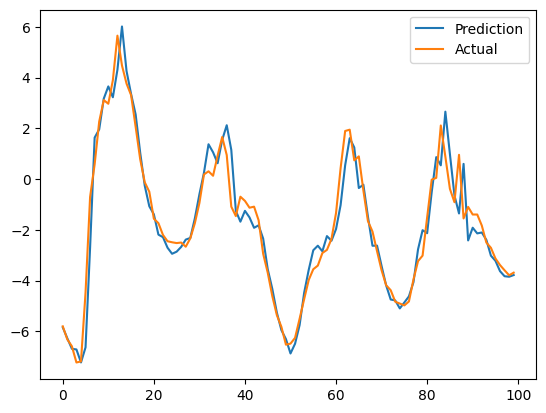

In [88]:
plottemp(post_df)

In [68]:
def plotpressure(df):
    plt.plot(df['Pressure Predictions'])
    plt.plot(df['Pressure Actuals'])
    plt.legend(['Prediction', 'Actuals'])
    return df

,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,-5.839054,-5.800450,-995.488098,-995.516229
1,-6.271905,-6.316305,-995.448853,-995.266229
2,-6.683881,-6.584549,-995.122375,-994.926229
3,-6.711432,-7.224209,-994.642212,-994.356229
4,-7.223190,-7.182940,-993.881470,-994.356229
...,...,...,...,...
95,-3.219479,-3.128324,-992.432068,-992.406229
96,-3.626779,-3.386251,-992.440002,-992.266229
97,-3.826507,-3.592593,-992.264954,-992.266229
98,-3.846310,-3.788617,-992.213501,-992.276229


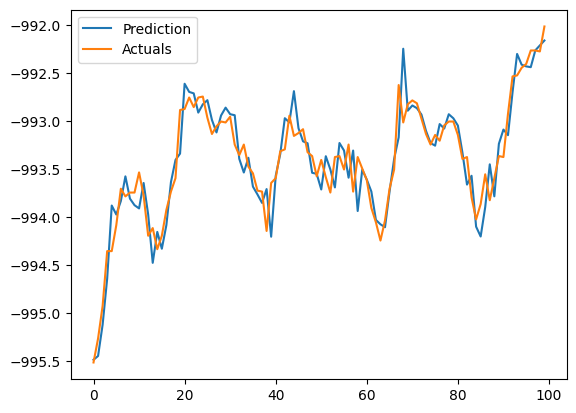

In [89]:
plotpressure(post_df)

In [78]:
def scorecalc(df, temp_actuals, temp_preds, pressure_actuals, pressure_preds):
    temp_scores = []
    pressure_scores = []
    for i in range(len(df.to_numpy())):
        temp_score = np.sqrt(mse(temp_actuals, temp_preds))
        pressure_score = np.sqrt(mse(pressure_actuals, pressure_preds))
        temp_scores.append(temp_score)
        pressure_scores.append(pressure_score)

    return temp_scores, pressure_scores

In [90]:
temp_scores, pressure_scores = scorecalc(post_df, post_df['Temperature Actuals'],
                                         post_df['Temperature Predictions'], 
                                         post_df['Pressure Actuals'], 
                                         post_df['Pressure Predictions'] 
                                         )

In [91]:
print(
    f'Temperature Score: {np.mean(temp_scores)}',
    f'Pressure Score: {np.mean(pressure_scores)}'
)

Temperature Score: 0.7741120291541193 Pressure Score: 0.230396686693839


# Comparing impact of Learning on Final Score

## Condensed Test + PostProcessing

In [99]:
model1 = Sequential()
model1.add(InputLayer((7,6)))
model1.add(GRU(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(2, 'linear'))

model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                13824     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 2)                 18        
                                                                 
Total params: 14362 (56.10 KB)
Trainable params: 14362 (56.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [100]:
cp1 = ModelCheckpoint('model1_', save_best_only = True)

In [101]:
model1.compile(loss = MeanSquaredError(),
              optimizer = Adam(learning_rate = 0.0001),
              metrics= [RootMeanSquaredError()])

In [102]:
model1.fit(X_train, y_train, 
           validation_data = (X_val, y_val), 
           epochs = 10, 
           callbacks = [cp1])

Epoch 1/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.0773 - root_mean_squared_error: 0.2781INFO:tensorflow:Assets written to: model1_\assets


INFO:tensorflow:Assets written to: model1_\assets


1875/1875 [==============================] - 24s 11ms/step - loss: 0.0771 - root_mean_squared_error: 0.2777 - val_loss: 0.0194 - val_root_mean_squared_error: 0.1394
Epoch 2/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.0145 - root_mean_squared_error: 0.1205INFO:tensorflow:Assets written to: model1_\assets


INFO:tensorflow:Assets written to: model1_\assets


1875/1875 [==============================] - 21s 11ms/step - loss: 0.0145 - root_mean_squared_error: 0.1205 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0974
Epoch 3/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.0085 - root_mean_squared_error: 0.0920INFO:tensorflow:Assets written to: model1_\assets


INFO:tensorflow:Assets written to: model1_\assets


1875/1875 [==============================] - 21s 11ms/step - loss: 0.0085 - root_mean_squared_error: 0.0919 - val_loss: 0.0059 - val_root_mean_squared_error: 0.0771
Epoch 4/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.0067 - root_mean_squared_error: 0.0816INFO:tensorflow:Assets written to: model1_\assets


INFO:tensorflow:Assets written to: model1_\assets


1875/1875 [==============================] - 20s 11ms/step - loss: 0.0067 - root_mean_squared_error: 0.0816 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0711
Epoch 5/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.0779INFO:tensorflow:Assets written to: model1_\assets


INFO:tensorflow:Assets written to: model1_\assets


1875/1875 [==============================] - 21s 11ms/step - loss: 0.0061 - root_mean_squared_error: 0.0778 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0682
Epoch 6/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.0760INFO:tensorflow:Assets written to: model1_\assets


INFO:tensorflow:Assets written to: model1_\assets


1875/1875 [==============================] - 20s 11ms/step - loss: 0.0058 - root_mean_squared_error: 0.0759 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0662
Epoch 7/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.0750INFO:tensorflow:Assets written to: model1_\assets


INFO:tensorflow:Assets written to: model1_\assets


1875/1875 [==============================] - 21s 11ms/step - loss: 0.0056 - root_mean_squared_error: 0.0750 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0653
Epoch 8/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.0743INFO:tensorflow:Assets written to: model1_\assets


INFO:tensorflow:Assets written to: model1_\assets


1875/1875 [==============================] - 20s 11ms/step - loss: 0.0055 - root_mean_squared_error: 0.0743 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0652
Epoch 9/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.0739INFO:tensorflow:Assets written to: model1_\assets


INFO:tensorflow:Assets written to: model1_\assets


1875/1875 [==============================] - 20s 11ms/step - loss: 0.0055 - root_mean_squared_error: 0.0739 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0643
Epoch 10/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.0736INFO:tensorflow:Assets written to: model1_\assets


INFO:tensorflow:Assets written to: model1_\assets


1875/1875 [==============================] - 19s 10ms/step - loss: 0.0054 - root_mean_squared_error: 0.0736 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0642


In [103]:
post_df = postprocessdf(model1, X_test, y_test)

159/159 [==============================] - 1s 4ms/step


In [104]:
temp_scores, pressure_scores = scorecalc(post_df, post_df['Temperature Actuals'],
                                         post_df['Temperature Predictions'], 
                                         post_df['Pressure Actuals'], 
                                         post_df['Pressure Predictions'] 
                                         )

In [105]:
print(
    f'Temperature Score: {np.mean(temp_scores)}',
    f'Pressure Score: {np.mean(pressure_scores)}'
)

Temperature Score: 0.7897852264553926 Pressure Score: 0.22414186603615946


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,-5.847591,-5.800450,-995.529053,-995.516229
1,-6.272377,-6.316305,-995.394775,-995.266229
2,-6.677881,-6.584549,-995.116821,-994.926229
3,-6.725950,-7.224209,-994.666748,-994.356229
4,-7.239097,-7.182940,-993.978516,-994.356229
...,...,...,...,...
95,-3.244494,-3.128324,-992.468872,-992.406229
96,-3.616121,-3.386251,-992.493530,-992.266229
97,-3.790066,-3.592593,-992.339783,-992.266229
98,-3.811309,-3.788617,-992.220825,-992.276229


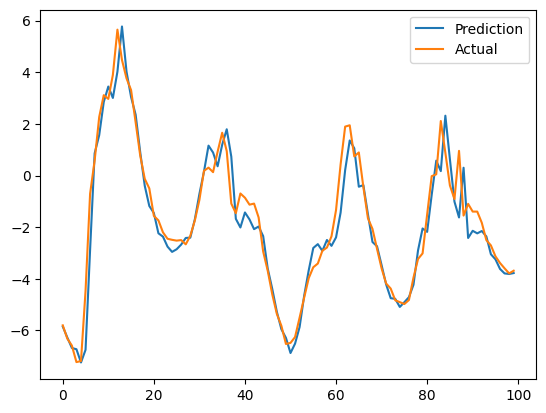

In [106]:
plottemp(post_df)

,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,-5.847591,-5.800450,-995.529053,-995.516229
1,-6.272377,-6.316305,-995.394775,-995.266229
2,-6.677881,-6.584549,-995.116821,-994.926229
3,-6.725950,-7.224209,-994.666748,-994.356229
4,-7.239097,-7.182940,-993.978516,-994.356229
...,...,...,...,...
95,-3.244494,-3.128324,-992.468872,-992.406229
96,-3.616121,-3.386251,-992.493530,-992.266229
97,-3.790066,-3.592593,-992.339783,-992.266229
98,-3.811309,-3.788617,-992.220825,-992.276229


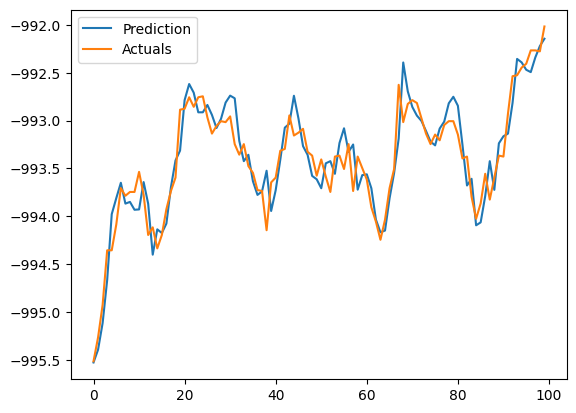

In [107]:
plotpressure(post_df)

## CNN
Testing the error given reduced training parameters

In [109]:
cnnmodel = Sequential()
cnnmodel.add(InputLayer((7,6)))
cnnmodel.add(Conv1D(64, kernel_size=2))
cnnmodel.add(Flatten())
cnnmodel.add(Dense(8, 'relu'))
cnnmodel.add(Dense(2, 'linear'))

cnnmodel.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 6, 64)             832       
                                                                 
 flatten_1 (Flatten)         (None, 384)               0         
                                                                 
 dense_8 (Dense)             (None, 8)                 3080      
                                                                 
 dense_9 (Dense)             (None, 2)                 18        
                                                                 
Total params: 3930 (15.35 KB)
Trainable params: 3930 (15.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [110]:
cnncp = ModelCheckpoint('cnnmodel/', save_best_only = True)

In [112]:
cnnmodel.compile(
    loss = MeanSquaredError(),
    optimizer = Adam(learning_rate = 0.0001),
    metrics = [RootMeanSquaredError()]
) #forgot this whole thing -> loss, optimizer, metrics

In [114]:
cnnmodel.fit(X_train, y_train,
             validation_data = (X_val, y_val),
             epochs = 10, # forgot this one
             callbacks = [cnncp]) # need to remember callbacks

Epoch 1/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.0160 - root_mean_squared_error: 0.1266INFO:tensorflow:Assets written to: cnnmodel\assets


INFO:tensorflow:Assets written to: cnnmodel\assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.0160 - root_mean_squared_error: 0.1265 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0982
Epoch 2/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.0097 - root_mean_squared_error: 0.0983INFO:tensorflow:Assets written to: cnnmodel\assets


INFO:tensorflow:Assets written to: cnnmodel\assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.0096 - root_mean_squared_error: 0.0982 - val_loss: 0.0067 - val_root_mean_squared_error: 0.0819
Epoch 3/10
1861/1875 [============================>.] - ETA: 0s - loss: 0.0079 - root_mean_squared_error: 0.0888INFO:tensorflow:Assets written to: cnnmodel\assets


INFO:tensorflow:Assets written to: cnnmodel\assets


1875/1875 [==============================] - 56s 30ms/step - loss: 0.0079 - root_mean_squared_error: 0.0888 - val_loss: 0.0062 - val_root_mean_squared_error: 0.0788
Epoch 4/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.0072 - root_mean_squared_error: 0.0849INFO:tensorflow:Assets written to: cnnmodel\assets


INFO:tensorflow:Assets written to: cnnmodel\assets


1875/1875 [==============================] - 8s 4ms/step - loss: 0.0072 - root_mean_squared_error: 0.0848 - val_loss: 0.0057 - val_root_mean_squared_error: 0.0752
Epoch 5/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.0828INFO:tensorflow:Assets written to: cnnmodel\assets


INFO:tensorflow:Assets written to: cnnmodel\assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.0068 - root_mean_squared_error: 0.0827 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0723
Epoch 6/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.0067 - root_mean_squared_error: 0.0818INFO:tensorflow:Assets written to: cnnmodel\assets


INFO:tensorflow:Assets written to: cnnmodel\assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.0067 - root_mean_squared_error: 0.0818 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0713
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0065 - root_mean_squared_error: 0.0809 - val_loss: 0.0061 - val_root_mean_squared_error: 0.0782
Epoch 8/10
1864/1875 [============================>.] - ETA: 0s - loss: 0.0064 - root_mean_squared_error: 0.0802INFO:tensorflow:Assets written to: cnnmodel\assets


INFO:tensorflow:Assets written to: cnnmodel\assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.0064 - root_mean_squared_error: 0.0802 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0703
Epoch 9/10
1865/1875 [============================>.] - ETA: 0s - loss: 0.0064 - root_mean_squared_error: 0.0797INFO:tensorflow:Assets written to: cnnmodel\assets


INFO:tensorflow:Assets written to: cnnmodel\assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.0064 - root_mean_squared_error: 0.0797 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0695
Epoch 10/10
1864/1875 [============================>.] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.0794INFO:tensorflow:Assets written to: cnnmodel\assets


INFO:tensorflow:Assets written to: cnnmodel\assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.0063 - root_mean_squared_error: 0.0793 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0690


In [115]:
post_df = postprocessdf(cnnmodel, X_test, y_test)

159/159 [==============================] - 0s 2ms/step


In [116]:
temp_scores, pressure_scores = scorecalc(post_df, post_df['Temperature Actuals'],
                                         post_df['Temperature Predictions'], 
                                         post_df['Pressure Actuals'], 
                                         post_df['Pressure Predictions'] 
                                         )

In [117]:
print(
    f'Temperature Score: {np.mean(temp_scores)}'
    f'Pressure Score: {np.mean(pressure_scores)}'
)

Temperature Score: 0.8389527079345203Pressure Score: 0.2847858903544891


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,-6.088012,-5.800450,-995.116211,-995.516229
1,-6.303023,-6.316305,-995.091187,-995.266229
2,-6.613942,-6.584549,-994.953430,-994.926229
3,-6.624719,-7.224209,-994.676514,-994.356229
4,-7.086801,-7.182940,-994.130310,-994.356229
...,...,...,...,...
95,-3.640525,-3.128324,-992.095947,-992.406229
96,-3.848030,-3.386251,-992.153870,-992.266229
97,-3.889115,-3.592593,-992.073853,-992.266229
98,-3.811933,-3.788617,-992.065430,-992.276229


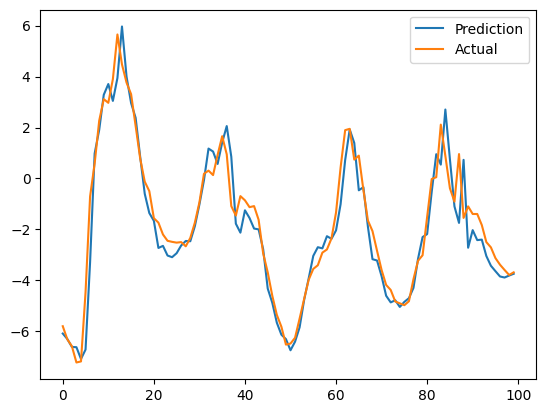

In [119]:
plottemp(post_df)

,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,-6.088012,-5.800450,-995.116211,-995.516229
1,-6.303023,-6.316305,-995.091187,-995.266229
2,-6.613942,-6.584549,-994.953430,-994.926229
3,-6.624719,-7.224209,-994.676514,-994.356229
4,-7.086801,-7.182940,-994.130310,-994.356229
...,...,...,...,...
95,-3.640525,-3.128324,-992.095947,-992.406229
96,-3.848030,-3.386251,-992.153870,-992.266229
97,-3.889115,-3.592593,-992.073853,-992.266229
98,-3.811933,-3.788617,-992.065430,-992.276229


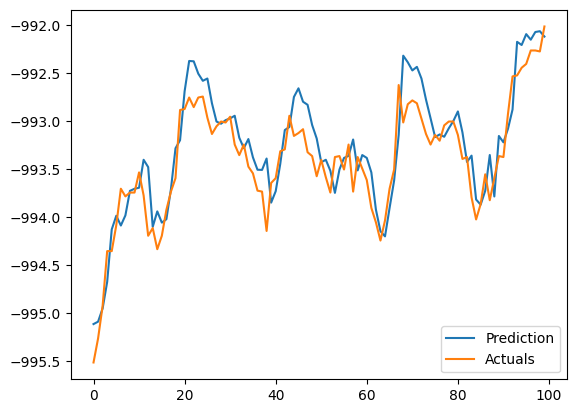

In [120]:
plotpressure(post_df)